# Machine Learning Code Snippets

### The idea of this notebook is to put together in one place a set of useful small code snippets for model comparison. 

This notebook is a **work in progress** which will be updated weekly.

## Loading the digits dataset

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.datasets import load_digits
digits = load_digits()
X,y = digits.data, digits.target
print(X)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]



## Comparing Models

### We can write a `for` loop that does the following:
- Iterates over a list of models, namely, ` GaussianNB`, `KNeighborsClassifier` and `LinearSVC`
- Trains each model using the training dataset `X_train` and `y_train`
- Predicts the target using the test features `X_test`
- Calculates the `f1_score`

$${F_1} = 2\frac{{{\rm{precision}} \times {\rm{recall}}}}{{{\rm{precision}} + {\rm{recall}}}}$$

- Note that the hyperparameters used for the three estimators are the default values

In [28]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

models = [LogisticRegression, GaussianNB, KNeighborsClassifier, LinearSVC]

for model in models:
    clf = model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' % (model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

LogisticRegression: 0.9539995483362096
GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
LinearSVC: 0.9348840920604145



### Comparison using cross-validation

In [46]:
from sklearn.model_selection import cross_val_score

lst_av_cross_val_scores = []

for model in models:
    clf = model()
    cross_val_scores = (model.__name__, cross_val_score(clf, X, y, cv=5))
    av_cross_val_scores = list(cross_val_scores)[1].mean()
    lst_av_cross_val_scores.append(av_cross_val_scores)
    print('%s: %s' % cross_val_scores) 
    print(model.__name__,av_cross_val_scores)

    
model_names = [model.__name__ for model in models]

df = pd.DataFrame(list(zip(model_names, lst_av_cross_val_scores)))
df.columns = ['Model','Average Cross-Validation']

df

LogisticRegression: [0.92307692 0.88121547 0.94986072 0.95798319 0.89295775]
LogisticRegression 0.9210188113360701
GaussianNB: [0.78296703 0.78176796 0.79387187 0.86554622 0.8084507 ]
GaussianNB 0.8065207555552298
KNeighborsClassifier: [0.9478022  0.9558011  0.96657382 0.98039216 0.96338028]
KNeighborsClassifier 0.9627899114966898
LinearSVC: [0.91208791 0.87845304 0.93036212 0.95238095 0.87887324]
LinearSVC 0.910431451914232


,Model,Average Cross-Validation
0,LogisticRegression,0.921019
1,GaussianNB,0.806521
2,KNeighborsClassifier,0.962790
3,LinearSVC,0.910431


In [49]:
df.set_index('Model', inplace=True)
df.head()

,Average Cross-Validation
Model,
LogisticRegression,0.921019
GaussianNB,0.806521
KNeighborsClassifier,0.962790
LinearSVC,0.910431


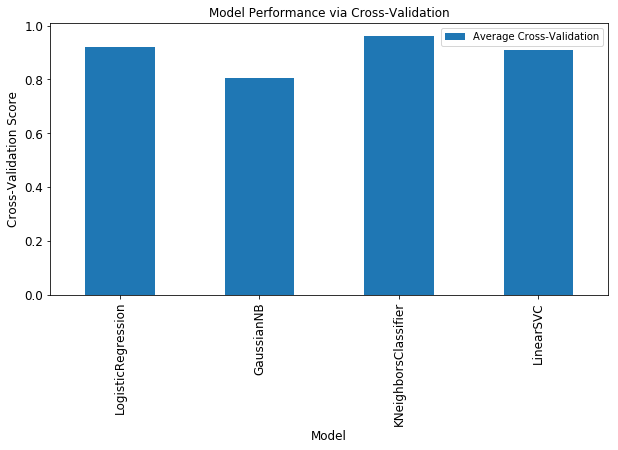

In [51]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
ax = df.plot(kind='bar', title ="Model Performance via Cross-Validation", figsize=(10, 5), fontsize=12)
ax.set_xlabel("Model", fontsize=12)
ax.set_ylabel("Cross-Validation Score", fontsize=12)
plt.show();